In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [4]:
data=pd.read_csv('Dataset of Diabetes .csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [9]:
data.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [1]:
data.loc[1:2, :]

NameError: name 'data' is not defined

In [11]:
data.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


<Axes: >

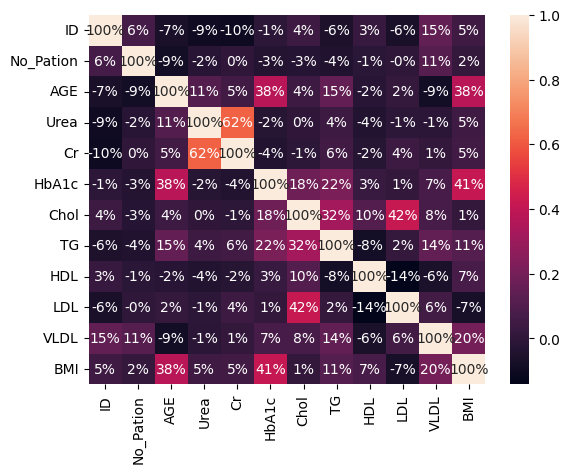

In [13]:

sns.heatmap(data.corr(numeric_only=True),annot=True ,fmt='.0%')

<Figure size 1000x600 with 0 Axes>

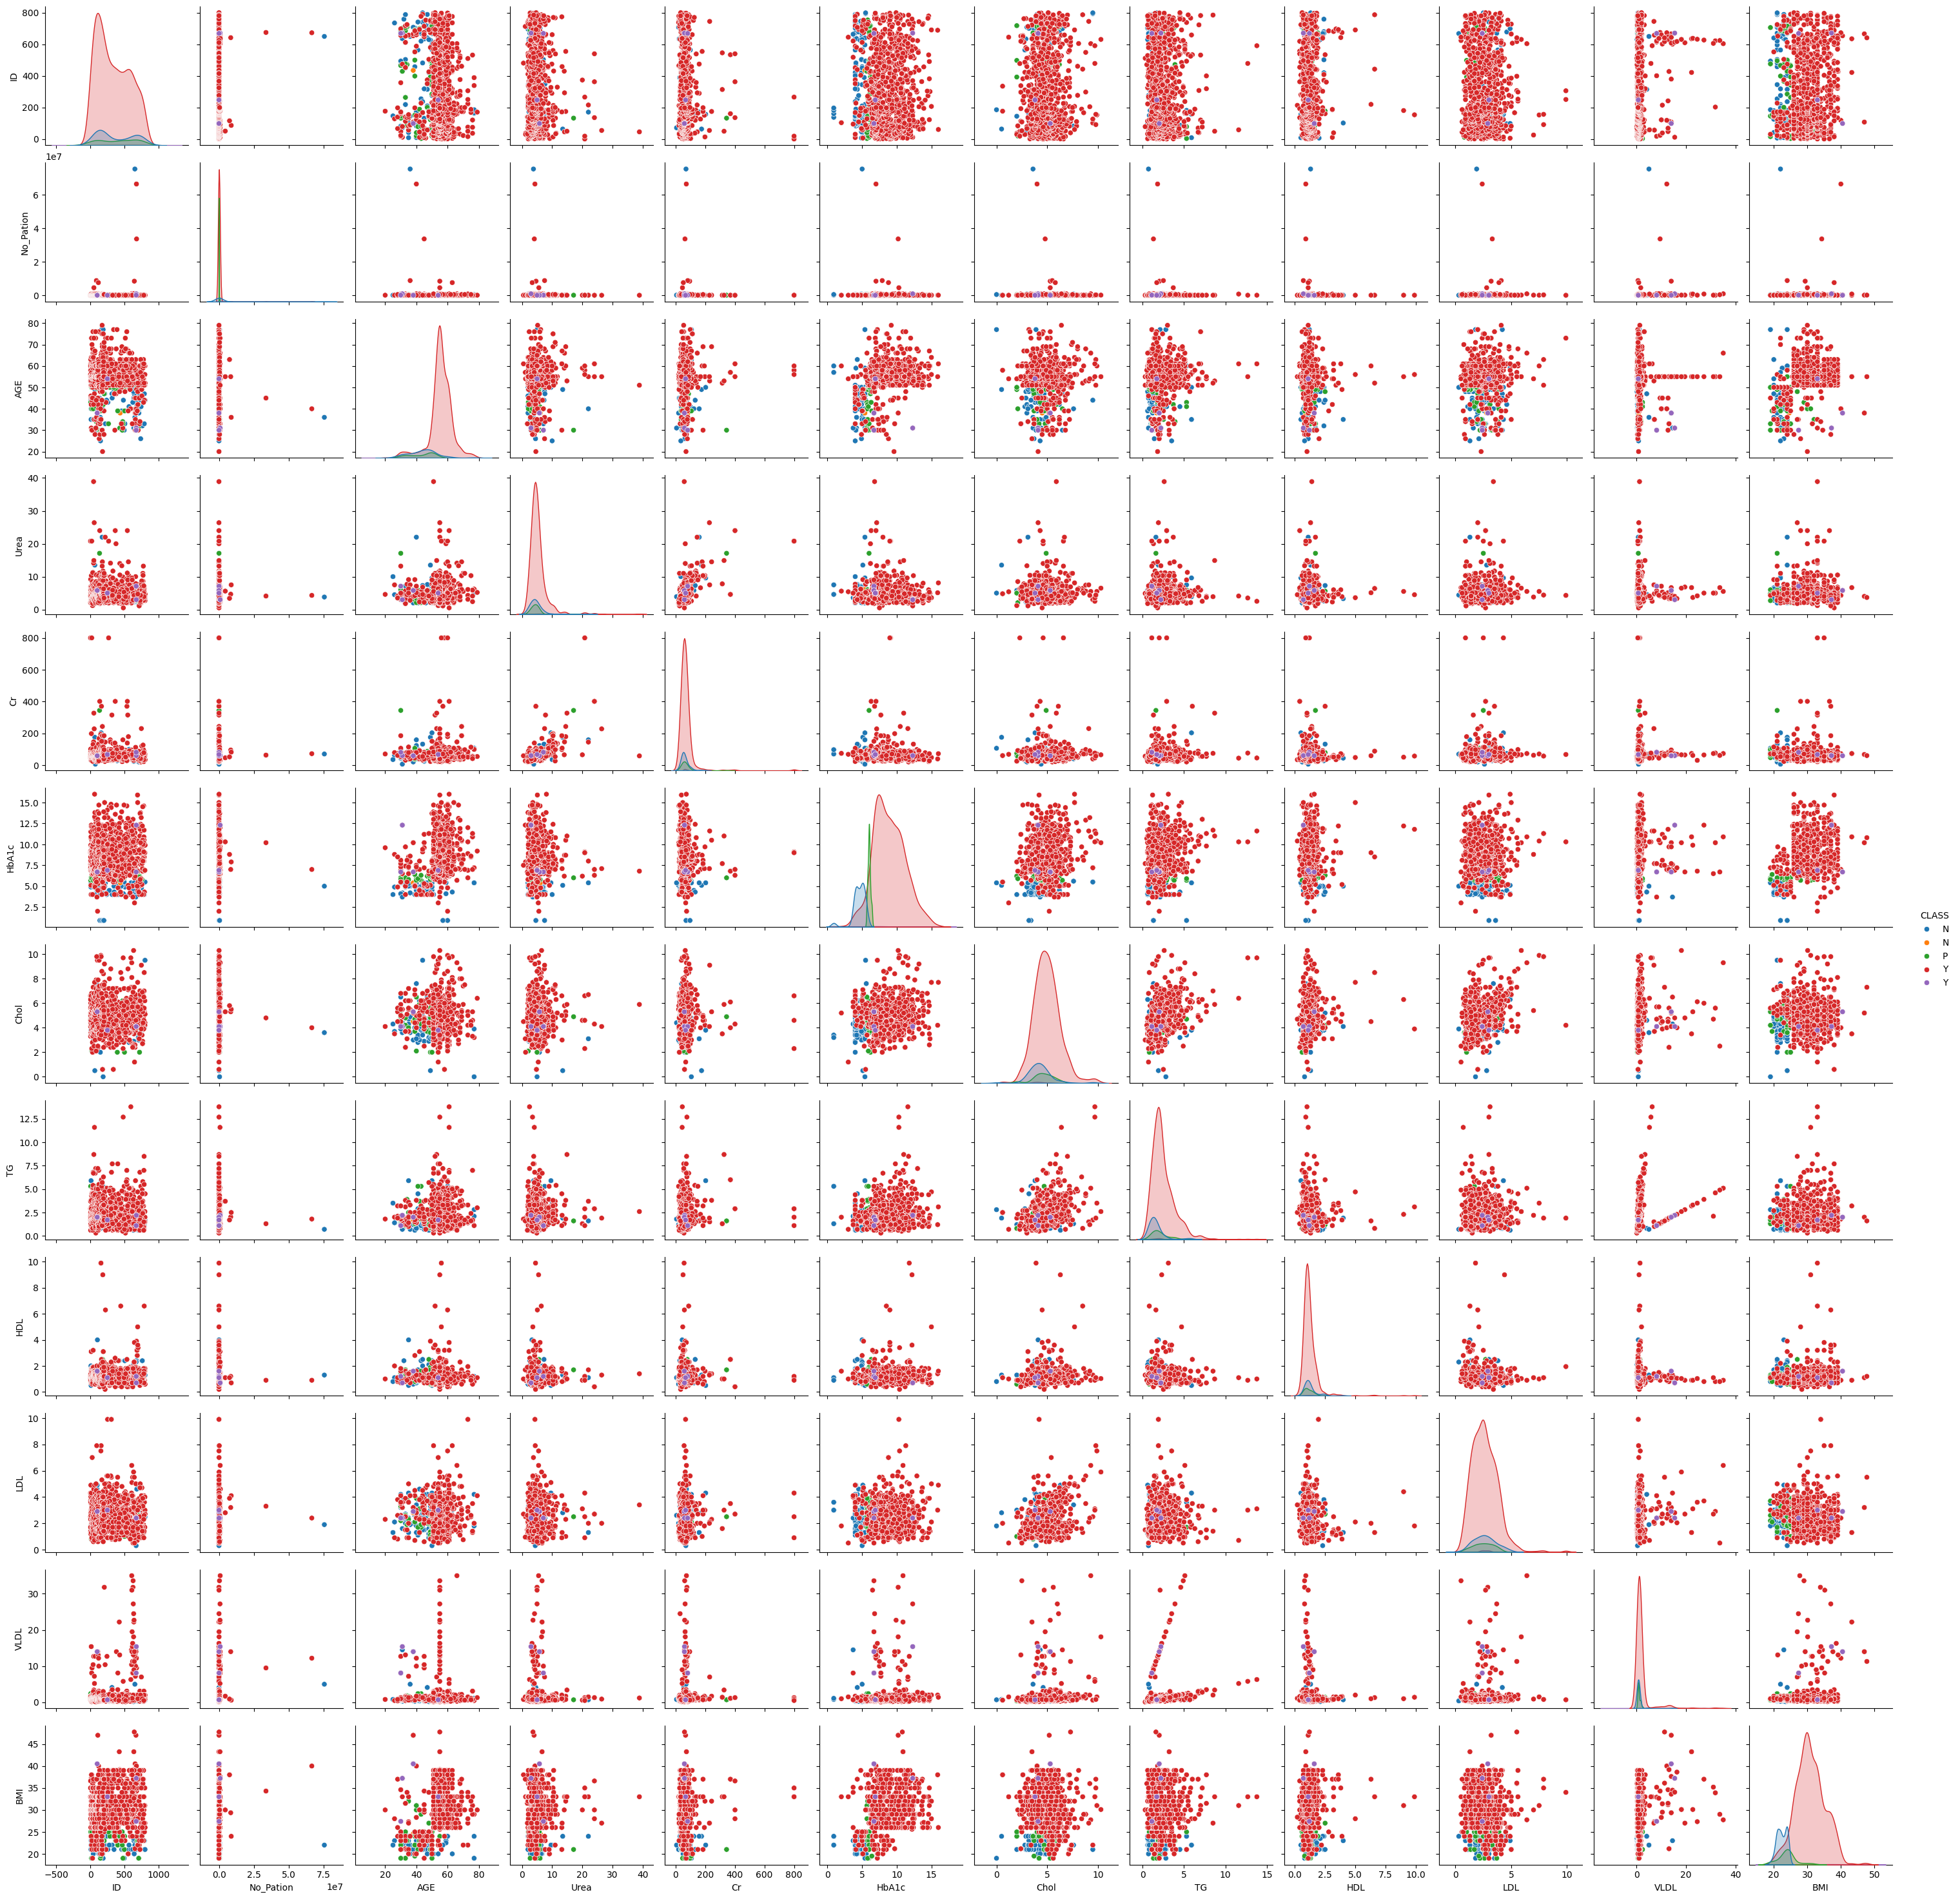

In [15]:
plt.figure(figsize=(10,6))
sns.pairplot(data , hue='CLASS')

In [18]:
data['No_Pation'].value_counts()

No_Pation
454316    19
856        2
87654      2
71741      2
34290      2
          ..
34342      1
3275       1
34343      1
23973      1
24054      1
Name: count, Length: 961, dtype: int64

In [20]:
data.drop(['No_Pation','ID'],axis=1,inplace=True)

In [21]:
data.columns

Index(['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [22]:
data['Gender'].value_counts()

Gender
M    565
F    434
f      1
Name: count, dtype: int64

In [ ]:
data[data['Gender']=='f']['Gender']='F'  #error

C:\Users\Amira\AppData\Local\Temp\ipykernel_29448\1854435924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data['Gender']=='f']['Gender']='F'


In [31]:
data.loc[data['Gender']=='f','Gender']='F'

In [32]:
data['Gender'].value_counts()

Gender
M    565
F    435
Name: count, dtype: int64

In [36]:
data['CLASS'].value_counts()

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

In [34]:
'y '.strip()

'y'

In [37]:
data['CLASS'] = data['CLASS'].apply(lambda x: x.strip())

In [38]:
data['CLASS'].value_counts()

CLASS
Y    844
N    103
P     53
Name: count, dtype: int64

<Axes: xlabel='AGE'>

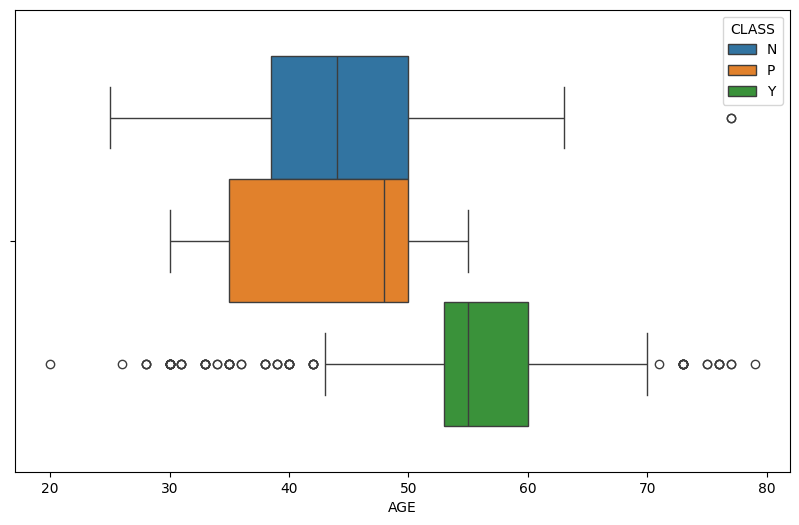

In [41]:
# outlires at age 
plt.figure(figsize=(10,6))
sns.boxplot(x=data['AGE'],hue=data['CLASS'])

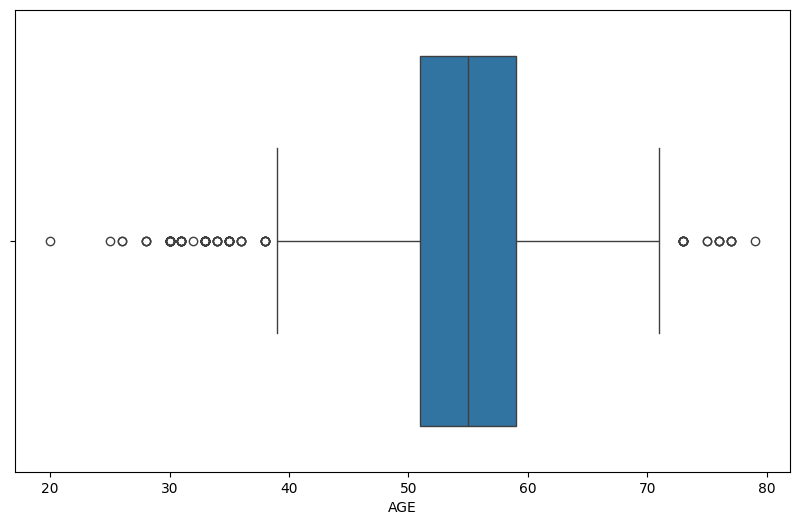

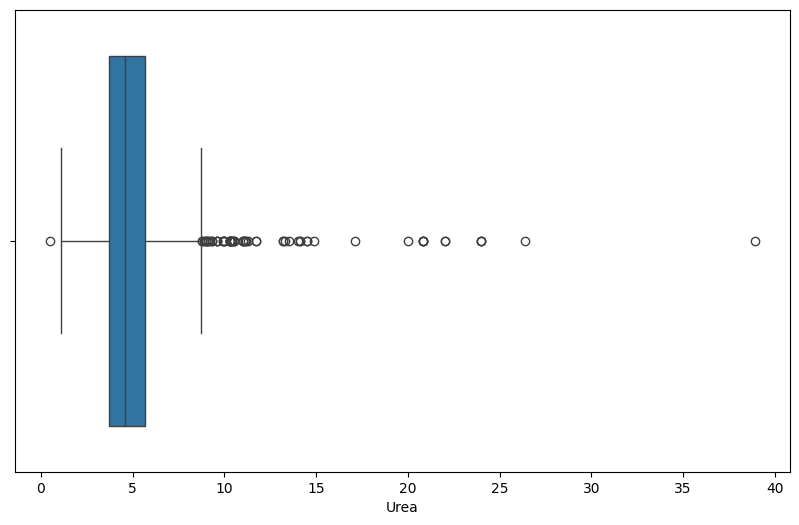

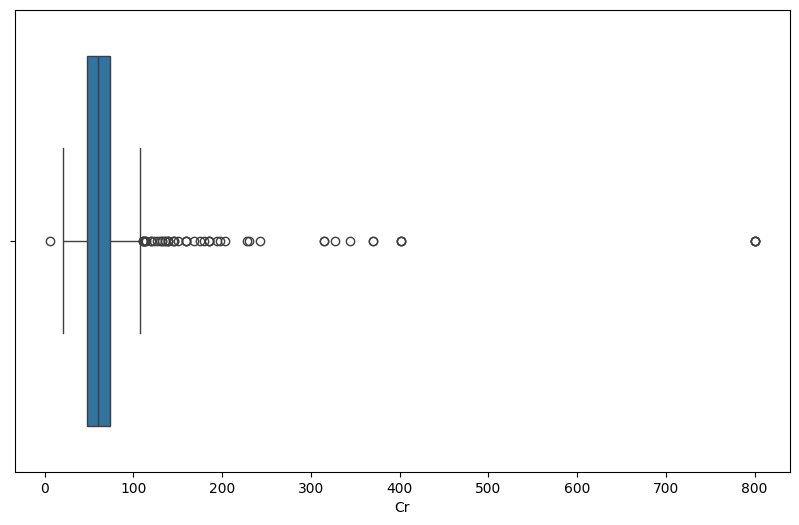

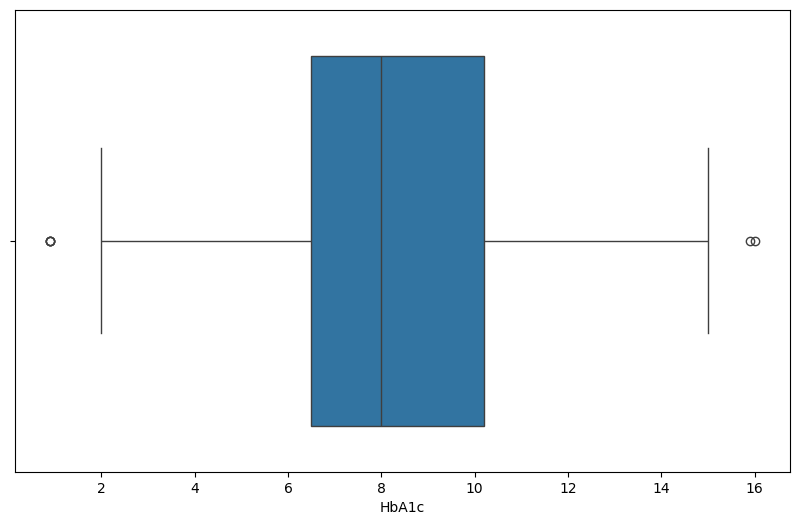

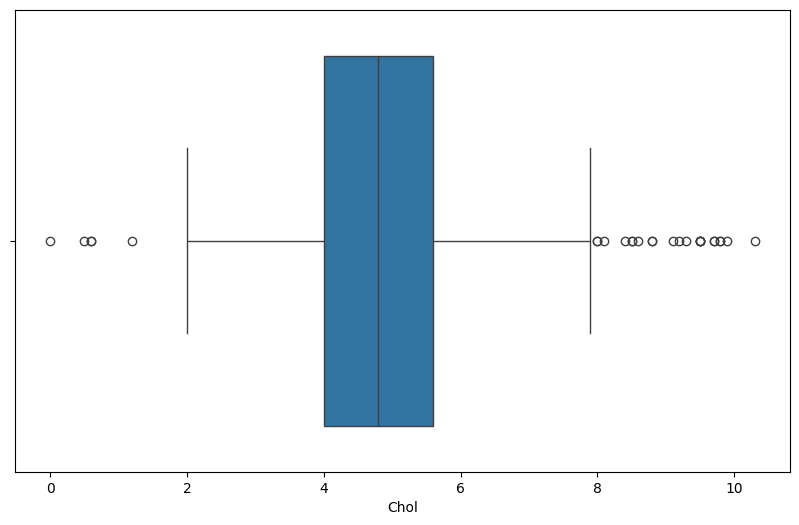

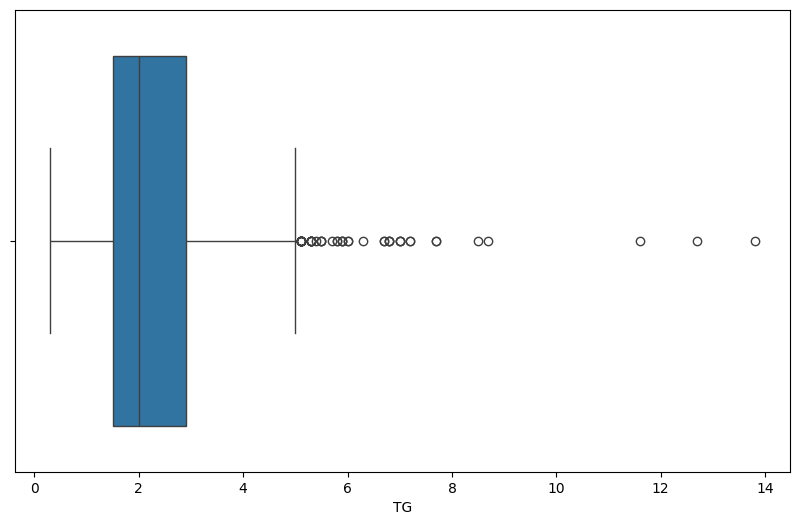

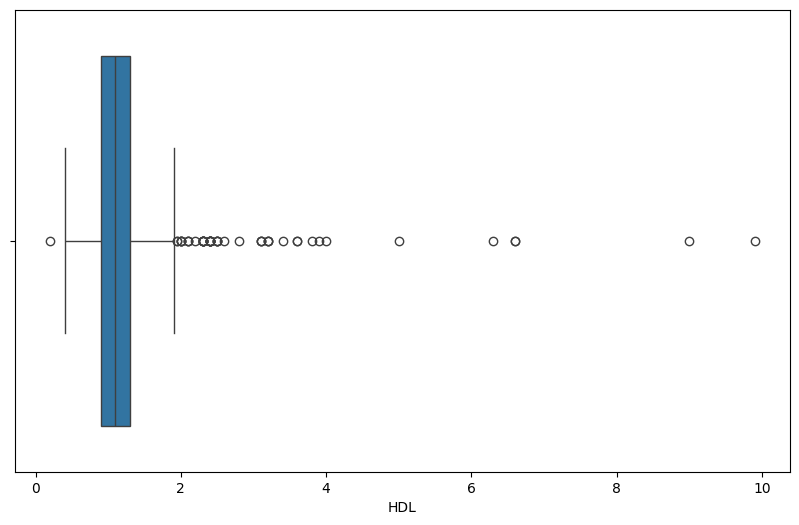

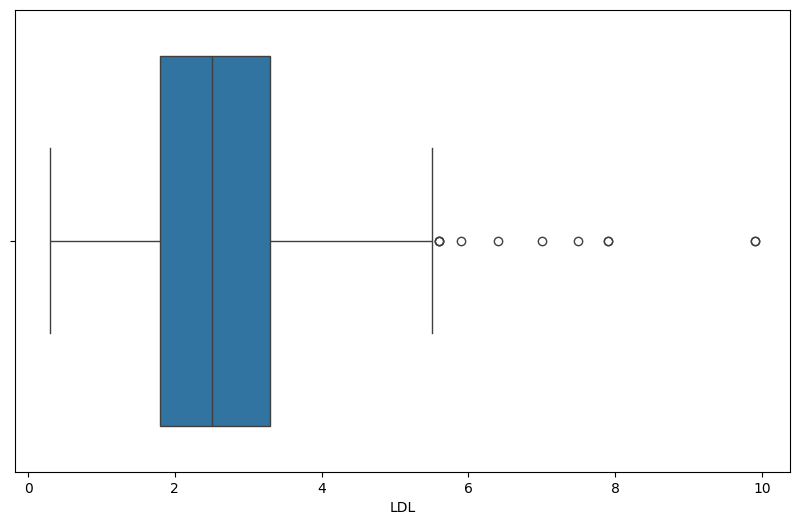

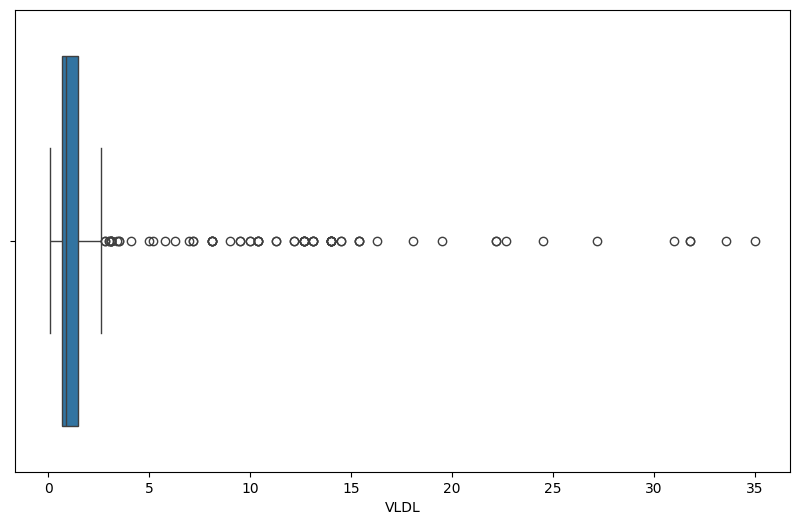

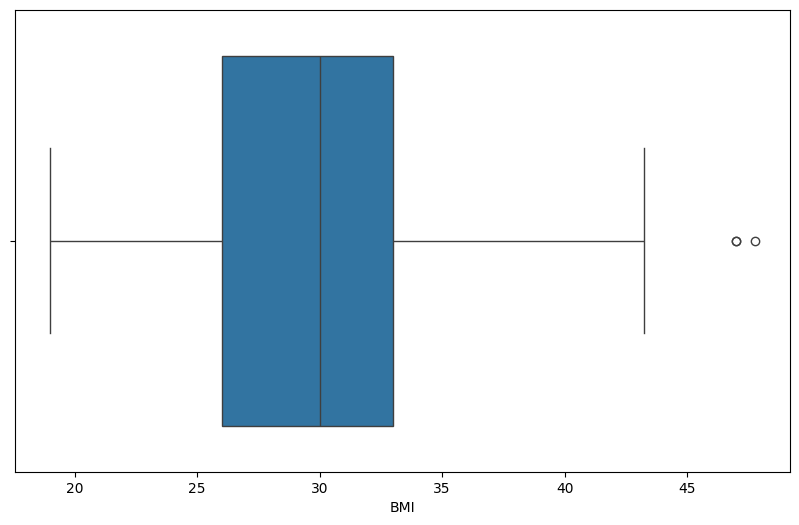

In [43]:
for i in data.select_dtypes('number').columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=data[i])
    plt.show()


In [45]:
data[data['Cr'] == data['Cr'].max()]

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
273,M,58,20.8,800,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
283,M,58,20.8,800,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
846,M,56,20.8,800,9.0,4.6,2.0,1.2,2.5,0.9,35.0,Y
860,M,60,20.8,800,9.0,2.3,1.1,0.9,0.9,0.5,33.0,Y


In [46]:
data.duplicated().sum()

174

In [47]:
data.drop_duplicates(inplace=True)

In [48]:
data.duplicated().sum()

0

In [49]:
#   x,y 
x=data.drop('CLASS',axis=1)
y=data['CLASS']

In [52]:
x['Gender']=x['Gender'].map({'M':1,'F':0})

In [54]:
y=y.map({'Y':1,'N':0,'P':2})

In [55]:
y.unique()

array([0, 2, 1], dtype=int64)

In [78]:
# test ,train 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train.drop('Gender', axis=1))
x_test_scaled=scaler.transform(x_test.drop('Gender', axis=1))

In [79]:
num_cols=x_train.drop('Gender', axis=1).columns
x_train[num_cols]=x_train_scaled
x_test[num_cols]=x_test_scaled

In [82]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((660, 11), (166, 11), (660,), (166,))

In [83]:
# logisitic regresation 
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [84]:
y_pred=model.predict(x_test)

In [86]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score   
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.94      0.99      0.96       136
           2       0.00      0.00      0.00         7

    accuracy                           0.93       166
   macro avg       0.59      0.62      0.61       166
weighted avg       0.89      0.93      0.91       166

0.927710843373494


C:\Users\Amira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Amira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Amira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

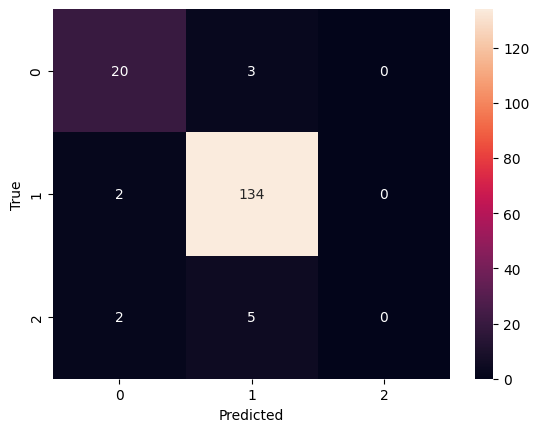

In [89]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [90]:
from sklearn import svm
model=svm.SVC(decision_function_shape='ovr')
model.fit(x_train,y_train)

SVC()

In [91]:
y_pred=model.predict(x_test)

In [92]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88        23
           1       0.95      0.99      0.97       136
           2       0.00      0.00      0.00         7

    accuracy                           0.93       166
   macro avg       0.60      0.63      0.61       166
weighted avg       0.89      0.93      0.91       166

0.9337349397590361


C:\Users\Amira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Amira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Amira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [101]:
from sklearn.tree import DecisionTreeClassifier
tr=DecisionTreeClassifier(class_weight='balanced')
tr.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [102]:
y_pred=tr.predict(x_test)

In [100]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.99      0.99      0.99       136
           2       0.88      1.00      0.93         7

    accuracy                           0.98       166
   macro avg       0.95      0.97      0.96       166
weighted avg       0.98      0.98      0.98       166

0.9819277108433735


In [97]:
y_test.value_counts()

CLASS
1    136
0     23
2      7
Name: count, dtype: int64

In [105]:
tr.predict([x_test.iloc[1,:]])  

C:\Users\Amira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [109]:
#---- deploy
import pickle as pkl
pkl.dump(tr,open('model.pkl','wb'))

In [110]:
pkl.dump(scaler,open('scalar.pkl','wb'))